In [58]:
#import all the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

<h1>Specify the file path</h1>

In [59]:
df = ("Datasets/DigitalAd_dataset.csv")

<h2>Load and summarize the dataset</h2>  

In [60]:
dataset = pd.read_csv(df)
print(dataset.shape)
print(dataset.head(5))
dataset.describe()

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


,Age,Salary,Status
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<h2>Segreggation of Dataset into Independent and Dependent Variables</h2>

In [61]:
# if you want to combine non-consecutive columns X = dataset.iloc[:,np.r_[0,1,2:3]]
X = dataset.iloc[:,:2].values
Y = dataset.iloc[:,2:3].values


<b>Splitting the data into train and test</b>

In [62]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,train_size = 0.75 ,random_state = 0)

In [63]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [64]:
#train the model
model = LogisticRegression(random_state = 0)
pred = model.fit(x_train,y_train)

c:\Users\Aspire_Lays\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
#predict the result and view the outcome
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [66]:
#Validate the model 
from sklearn.metrics import accuracy_score
print("The accurcy is {0}%".format(accuracy_score(y_test,y_pred)*100))

The accurcy is 80.0%


In [67]:
# Make the confusion matrix into a dataframe
cm = confusion_matrix(y_test,y_pred)
val = np.mat(cm) 

df_cm = pd.DataFrame(

        val, index=[0,1], columns=[0,1], 

    )
print(df_cm)

    0   1
0  61   0
1  20  19


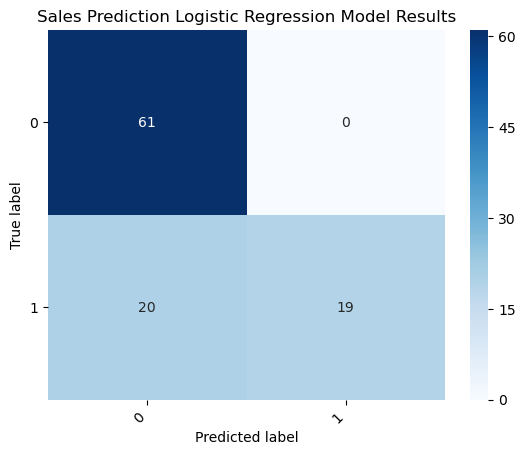

In [68]:
#plot the heatmap of the confusion matrix to show the accuracy for our model 
import seaborn as sns
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title('Sales Prediction Logistic Regression Model Results')

plt.show()    

<h2>Input your desired age and salary to check if they will buy the product or not</h2>

In [69]:


age = int(input("Enter the Customer's Age:"))
salary = int(input("Enter the Customer's salary:"))
custnew = [[age,salary]]
pred = model.predict(sc.transform(custnew))
if pred==0:
    print("Will not buy")
else:
    print("Will buy")
        

Will not buy
